# Lab 1
## Read data from csv and set it up for training/testing

In [4]:
import pandas as pd
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import numpy as np
def read_data(file_name):
    data = pd.read_csv(file_name)
    y = data['class']
    x = data.drop(['class'],axis = 1)
    xtr, xt, ytr, yt = train_test_split(x,y,test_size=0.34, random_state=10)
    return  xtr, xt, ytr, yt

x_train1, x_test1, y_train1, y_test1 = read_data("../data/diabetes.csv")
x_train2, x_test2, y_train2, y_test2 = read_data("../data/glass.csv")

     preg  plas  pres  skin  insu  mass   pedi  age
659     3    80    82    31    70  34.2  1.292   27
439     6   107    88     0     0  36.8  0.727   31
72     13   126    90     0     0  43.4  0.583   42
329     6   105    70    32    68  30.8  0.122   37
692     2   121    70    32    95  39.1  0.886   23
..    ...   ...   ...   ...   ...   ...    ...  ...
369     1   133   102    28   140  32.8  0.234   45
320     4   129    60    12   231  27.5  0.527   31
527     3   116    74    15   105  26.3  0.107   24
125     1    88    30    42    99  55.0  0.496   26
265     5    96    74    18    67  33.6  0.997   43

[506 rows x 8 columns]
          RI     Na    Mg    Al     Si     K     Ca    Ba    Fe
166  1.51747  12.84  3.50  1.14  73.27  0.56   8.55  0.00  0.00
21   1.52475  11.45  0.00  1.88  72.19  0.81  13.24  0.00  0.34
136  1.51754  13.48  3.74  1.17  72.99  0.59   8.03  0.00  0.00
206  1.51623  14.20  0.00  2.79  73.46  0.04   9.04  0.40  0.09
75   1.51652  13.56  3.57  1.47 

## Training
Train one-level  decision  trees  and  multi-level  decision  trees
on  the  two  data sets.
Determine the accuracy rates of the resulting classifiers
using the training set and hold-out validation

In [16]:
def train_level_depth (xtr,ytr,depth):  # fit single/multi level depth tree
    c = tree.DecisionTreeClassifier(criterion= 'entropy', max_depth=depth)
    c.fit(xtr,ytr)
    return c
def level_depth_holdout(xtr,xt,ytr,yt,depth):
    return accuracy_score(yt,train_level_depth(xtr,ytr,depth).predict(xt))
def level_depth_accuracy_training(xtr,ytr,depth):
    return accuracy_score(ytr,train_level_depth(xtr,ytr,depth).predict(xtr))

print("Dataset 1")
print("Accuracy training one-level: ",level_depth_accuracy_training(x_train1,y_train1,depth=1))
print("Accuracy training multi-level: ",level_depth_accuracy_training(x_train1,y_train1,depth=None))

print("Accuracy Holdout validation one-level: ",level_depth_holdout(x_train1,x_test1,y_train1,y_test1,depth=1))
print("Accuracy Holdout validation multi-level: ",level_depth_holdout(x_train1,x_test1,y_train1,y_test1,depth=None))

print("Dataset 2")
print("Accuracy training one-level: ",level_depth_accuracy_training(x_train2,y_train2,depth=1))
print("Accuracy training multi-level: ",level_depth_accuracy_training(x_train2,y_train2,depth=None))

print("Accuracy Holdout validation one-level: ",level_depth_holdout(x_train2,x_test2,y_train2,y_test2,depth=1))
print("Accuracy Holdout validation multi-level: ",level_depth_holdout(x_train2,x_test2,y_train2,y_test2,depth=None))


Dataset 1
Accuracy training one-level:  0.7648221343873518
Accuracy training multi-level:  1.0
Accuracy Holdout validation one-level:  0.7213740458015268
Accuracy Holdout validation multi-level:  0.7366412213740458
Dataset 2
Accuracy training one-level:  0.46099290780141844
Accuracy training multi-level:  1.0
Accuracy Holdout validation one-level:  0.4246575342465753
Accuracy Holdout validation multi-level:  0.6712328767123288


**Explain why there is a  difference in  the accuracy rates.
Compare one-level decision trees and multi-level decision trees in terms of explainability.**

By setting the maximum depth of the tree, nodes are expanded until all the leaves contain less
than min_samples_split samples.
The higher value of maximum depth causes overfitting, and a lower value causes underfitting

**Experiment with multi-level decision trees and error pre-pruning by changing the option min_samples_leaf from 0
to the size of the datasets (use some step).**
**Estimate  the  accuracy  rates  of  the  resulting  decision  trees using the training set and hold-out validation.
Plot the accuracy rates based on the training set and hold-out validation for min_samples_leaf from 1 to the size
of the datasets with step of 5.**

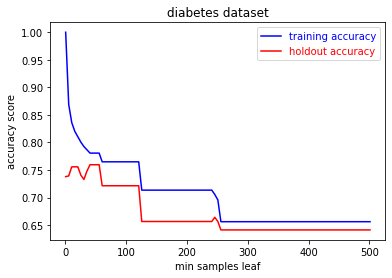

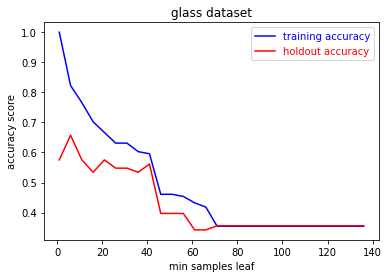

In [17]:
def msl_train (xtr,ytr,msl):  # fit the decision tree classifier
    c = tree.DecisionTreeClassifier(criterion= 'entropy',max_depth=None, min_samples_leaf=msl)
    c.fit(xtr,ytr)
    return c
def msl_holdout(xtr,xt,ytr,yt,msl):
    return accuracy_score(yt,msl_train(xtr,ytr,msl).predict(xt))  # predict on the test set
def msl_accuracy_training(xtr,ytr,msl):
    return accuracy_score(ytr,msl_train(xtr,ytr,msl).predict(xtr))  # predict on the training set


def plot_validation_multi_level(xtr,xt,ytr,yt,ite,title):
    min_samples_leaf = range(1, len(ytr), 5)  # create steps for the method
    avg_holdout=[]
    avg_acc = []
    for i in min_samples_leaf:  # iterate through each step changing min_sample_leaf param.
        holdout=[]
        acc = []
        for k in range(1,ite):  # iterate multiple times to average the results
            holdout.append(msl_holdout(xtr,xt,ytr,yt,i))   # holdout validation accuracy
            acc.append(msl_accuracy_training(xtr,ytr,i))   # training accuracy
        avg_holdout.append([i,(sum(holdout)/len(holdout))])  # average out the value
        avg_acc.append([i,sum(acc)/len(acc)])
    avg_holdout= np.array(avg_holdout)
    avg_acc = np.array(avg_acc)
    p2, = plt.plot(avg_acc[:,0], avg_acc[:,1],'b', label= "training accuracy")
    p1, = plt.plot(avg_holdout[:,0],avg_holdout[:,1],'r', label= "holdout accuracy")
    l = plt.legend()
    l.texts[0].set_color(p2.get_color())
    l.texts[1].set_color(p1.get_color())
    plt.xlabel("min samples leaf")
    plt.ylabel("accuracy score")
    plt.title(title)
    plt.show()


plot_validation_multi_level(x_train1,x_test1,y_train1,y_test1,10,"diabetes dataset")
plot_validation_multi_level(x_train2,x_test2,y_train2,y_test2,10,"glass dataset")



**Identify  the  regions  of  underfitting,  optimality,  and  overfitting.
Explain how you have identified these regions.**

### Overfitting is when the error on the training set is low but then the error on the test set is large.

The method presents a small region of overfitting when the min_sample_leaf parameter is small,
indeed with both datasets, the training accuracy is very high in this part of the graph,
but the testing validation gives a high error (small accuracy).

### Underfitting is when the error on both the training and test sets is very high.

The method presents a region of underfitting when the min_sample_leaf parameter is high as the number of
instances in the dataset, because both the training and the testing validation error are quite high. (small accuracy)
This reasoning is likely equal for both datasets.

### Optimality is when errors are close to each other being low.

The method presents a region of optimality when the min_sample_leaf parameter is around 1/5 of the number
of instances in the dataset because training and holdout accuracy are both tight together with a high value.
This reasoning is likely equal for both datasets.